# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Soldier Race Project (Supervised Project)</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

# About Dataset

**ANSUR II Databases: Etnik Köken Tahmini**

**1. Genel Bakış:** 
- ANSUR II (Anthropometric Survey of U.S. Army Personnel), 2012'de ABD Ordusu tarafından yürütülen geniş çaplı bir antropometrik (vücut ölçümleri) araştırmasının sonuçlarına dayanmaktadır.
  
**2. Veri Setinin İçeriği:**

- ANSUR II, ordu personelinin vücut ölçümlerini ve etnik köken bilgilerini içerir. Veri kümesi, bireylerin farklı vücut bölümlerinden alınan 100'den fazla ölçümü kapsar. Ölçümler, baş, el, ayak, bacak, kol, göğüs vb. gibi farklı vücut bölümlerine ait detayları içerir.

- Veri seti, doğrudan ölçülen 93 antropometrik ölçüm ve aşağıda açıklanan 15 demografik/idari değişken içerir. 

- Erkek veri seti, toplam 4.082 denekten oluşan bir örnek içerir. 

- ANSUR II Kadın veri seti, toplam 1.986 denekten oluşan bir örnek içerir.

- Ayrıca  antropometrik ve demografik verilere ek olarak, ANSUR II veri tabanı ayrıca Asker katılımcılarının 3B tüm vücut, ayak ve kafa taramalarından oluşur. 
- Bu 3B veriler, ANSUR II katılımcılarının mahremiyetine saygı nedeniyle halka açık değildir. 

**3. Kimler Katıldı?**
- Bu veritabanı, aktif görevdeki ordu personelinin çeşitli etnik gruplarından ve yaş gruplarından temsilcileri içermektedir. Veri kümesinde, hem erkeklerden hem de kadınlardan alınan ölçümler bulunmaktadır.

**4. Ölçüm ve Etnik Köken İlişkisi:**
- Farklı etnik gruplar, genetik ve çevresel faktörlere bağlı olarak farklı vücut yapısına sahip olabilir. Bu, bacak uzunluğu, kafa yapısı, el ve ayak ölçümleri gibi ölçümlerde farklılıklarla gözlemlenebilir.

**5. Modelleme ve Tahmin:**
- Etnik köken tahmini, ANSUR II veri kümesindeki vücut ölçümleri kullanılarak bir sınıflandırma problemi olarak ele alınabilir.
- Kullanılacak algoritma, ölçümler ile etnik köken arasındaki ilişkiyi öğrenir ve yeni verilere uygulanarak etnik köken tahminleri yapabilir.

**6. Projenin Önemi ve Uygulama Alanları:**
- Bu tür bir araştırma, ordu personelinin vücut ölçülerini analiz ederek askeri ekipman, kıyafet ve diğer sistemlerin tasarım ve üretimi için kullanılmaktadır. Doğru ölçümler, askeri personelin rahatlığı, hareket kabiliyeti ve genel güvenliği için kritik öneme sahiptir.

- Ayrıca birçok potansiyel ticari, endüstriyel ve akademik uygulamaya sahiptir.

- Ek olarak belki de Laser okuyucular ve sensörler ile örnek veriyorum bir havaalanından girişte kökeni tespit edilebilir. 

DATA DICT:

https://data.world/search?q=ansur&scope=_all

https://mreed.umtri.umich.edu/mreed/downloads.html#ansur2

https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

https://www.kaggle.com/datasets/seshadrikolluri/ansur-ii/data

# Tasks

Keşifsel Veri Analizi (EDA)

- Kütüphaneleri İçe Aktarma

- Veri Kümesi Yükleme

- Verileri Keşfetme

Veri Ön İşleme

- Scaling (gerekirse)

- Train-Test Split

Sınıflandırma Algoritmaları

- Logistic Regression 

- SVM Classifier 

- Random Forest Classifier 

- XGBoost Classifier 

Modelleri Karşılaştırın

Final Model

SMOTE

SHAP

# EDA

**Retrieve data from the following links and create a data frame**

- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [1267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier    
from lightgbm import LGBMClassifier    
from xgboost import XGBClassifier    

In [1268]:
df_male = pd.read_csv("ANSUR II MALE Public.csv")

In [1269]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [1270]:
df_female = pd.read_csv("ANSUR II FEMALE Public.csv")

In [1271]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [1272]:
df_female.columns = df_female.columns.str.lower()

In [1273]:
df_male.columns = df_male.columns.str.lower()

In [1274]:
for i in df_male.columns:
   print(i)

subjectid
abdominalextensiondepthsitting
acromialheight
acromionradialelength
anklecircumference
axillaheight
balloffootcircumference
balloffootlength
biacromialbreadth
bicepscircumferenceflexed
bicristalbreadth
bideltoidbreadth
bimalleolarbreadth
bitragionchinarc
bitragionsubmandibulararc
bizygomaticbreadth
buttockcircumference
buttockdepth
buttockheight
buttockkneelength
buttockpopliteallength
calfcircumference
cervicaleheight
chestbreadth
chestcircumference
chestdepth
chestheight
crotchheight
crotchlengthomphalion
crotchlengthposterioromphalion
earbreadth
earlength
earprotrusion
elbowrestheight
eyeheightsitting
footbreadthhorizontal
footlength
forearmcenterofgriplength
forearmcircumferenceflexed
forearmforearmbreadth
forearmhandlength
functionalleglength
handbreadth
handcircumference
handlength
headbreadth
headcircumference
headlength
heelanklecircumference
heelbreadth
hipbreadth
hipbreadthsitting
iliocristaleheight
interpupillarybreadth
interscyei
interscyeii
kneeheightmidpatella
k

## Concating df_male and df_female

In [1276]:
df = pd.concat([df_male, df_female], ignore_index=True)
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,branch,primarymos,subjectsbirthlocation,subjectnumericrace,ethnicity,dodrace,age,heightin,weightlbs,writingpreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [1277]:
df.gender

0         Male
1         Male
2         Male
3         Male
4         Male
         ...  
6063    Female
6064    Female
6065    Female
6066    Female
6067    Female
Name: gender, Length: 6068, dtype: object

## Null values

In [1279]:
df.isnull().sum().any()

True

In [1280]:
df.isnull().sum()

subjectid                         0
abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
                                 ..
dodrace                           0
age                               0
heightin                          0
weightlbs                         0
writingpreference                 0
Length: 108, dtype: int64

In [1281]:
for i in df.columns:
    if df[i].isnull().sum() != 0:  # Sütundaki eksik değerleri kontrol ediyor
        print(f"{i} : {df[i].isnull().sum()}")

ethnicity : 4647


In [1282]:
df.ethnicity

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
6063    Mexican
6064    Mexican
6065        NaN
6066    Mexican
6067    Mexican
Name: ethnicity, Length: 6068, dtype: object

In [1283]:
df.drop("ethnicity", axis = 1, inplace = True)

In [1284]:
df.duplicated().sum()

0

In [1285]:
df = df[(df["dodrace"] == 1) | (df["dodrace"] == 2) | (df["dodrace"] == 3)]

## Checking Outliers

In [1287]:
numeric_df = df.select_dtypes(include="number")

def outliers(df):

    for col in df.select_dtypes(include='number').columns:

        Q1 = df[col].quantile(0.25)

        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        outliers = numeric_df[(numeric_df[col] < (Q1 - 3 * IQR)) | (df[col] > (Q3 + 3 * IQR))]

        

        print(f"{col} - Outliers:")

        print(f"Number of Outliers: {outliers.shape[0]}")

        print(outliers[[col]])  

        print("---------------------------")

In [1288]:
outliers(df)

subjectid - Outliers:
Number of Outliers: 1
      subjectid
6067     920103
---------------------------
abdominalextensiondepthsitting - Outliers:
Number of Outliers: 1
    abdominalextensiondepthsitting
55                             451
---------------------------
acromialheight - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [acromialheight]
Index: []
---------------------------
acromionradialelength - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [acromionradialelength]
Index: []
---------------------------
anklecircumference - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [anklecircumference]
Index: []
---------------------------
axillaheight - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [axillaheight]
Index: []
---------------------------
balloffootcircumference - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [balloffootcircumference]
Index: []
---------------------------
balloffootlength - Outliers:
Number of Outliers: 0
E

## Understanding the Features

In [1290]:
df.dodrace.value_counts()

dodrace
1    3792
2    1298
3     679
Name: count, dtype: int64

In [1291]:
df.subjectnumericrace.value_counts()

subjectnumericrace
1        3559
2        1025
3         541
31        159
8         106
51        102
21         60
23         34
28         26
251        20
41         19
18         16
61         15
25         13
38          9
351         9
231         6
42          6
62          6
35          5
235         4
43          3
63          3
218         3
431         2
2351        2
423         2
2518        2
4251        1
238         1
318         1
451         1
4           1
425         1
428         1
651         1
6           1
631         1
358         1
42351       1
Name: count, dtype: int64

In [1292]:
df.dodrace.nunique()

3

In [1293]:
df.subjectnumericrace.unique()

array([    1,     2,   351,     3,    61,    28,    21,    31,    23,
           8,   251,    38,    51,    41,    18,    63,    25,   423,
          35,   425,   235,    43,   318,   358,    62,     4,   451,
         238,  4251,   431,  2518,    42,   218,   231,   428,   651,
           6,   631,  2351, 42351], dtype=int64)

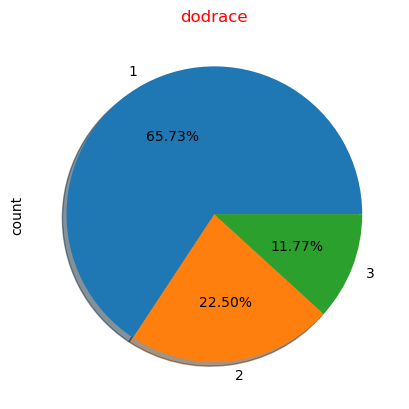

In [1294]:
plt.rcParams.update({'font.size': 10})
df['dodrace'].value_counts().plot.pie(#explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('dodrace',color='Red',loc='center');
plt.show()

In [1295]:
df["weightlbs"]

0       180
1       160
2       205
3       175
4       213
       ... 
6063    180
6064    150
6065    168
6066    133
6067    132
Name: weightlbs, Length: 5769, dtype: int64

In [1296]:
df["weightlbs"].max()

321

In [1297]:
df["weightlbs"].min()

0

In [1298]:
df[df["weightlbs"] == 0]

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,component,branch,primarymos,subjectsbirthlocation,subjectnumericrace,dodrace,age,heightin,weightlbs,writingpreference
866,13956,241,1462,329,230,1334,248,201,418,404,...,Regular Army,Combat Arms,19Z,Puerto Rico,3,3,41,71,0,Right hand


In [1299]:
print(df['weightlbs'].value_counts().sort_values(ascending=True).to_string())

weightlbs
101      1
259      1
96       1
86       1
90       1
98       1
283      1
268      1
315      1
290      1
256      1
252      1
292      1
251      1
258      1
276      1
267      1
88       1
293      1
272      1
321      1
0        1
274      1
295      1
243      1
107      2
102      2
234      2
246      2
104      2
249      2
279      2
310      2
231      2
254      2
109      3
300      3
106      3
232      3
253      3
244      3
113      3
95       3
216      3
257      3
233      4
111      4
239      4
248      4
237      4
241      4
285      4
108      5
100      5
121      5
229      5
103      6
227      6
151      6
219      6
199      6
275      6
221      6
112      6
119      6
236      6
224      7
280      7
226      7
247      7
114      8
105      8
117      8
265      8
222      9
217      9
223      9
238      9
131      9
211     10
228     10
270     10
242     10
191     11
129     11
159     12
201     12
123     12
122     12
214     12


In [1300]:
df["weightkg"]

0       815
1       726
2       929
3       794
4       946
       ... 
6063    832
6064    717
6065    762
6066    632
6067    610
Name: weightkg, Length: 5769, dtype: int64

**Logistic Regression'da multicollinearity sorununa yol açmamak için aynı bilgiyi taşıyan lbs ve kg gibi sütunlardan birini silmeliyiz. Bu sütunlar arasında tam doğrusal ilişki olduğu için katsayılar kararsız hale gelir, yorumlanabilirlik zorlaşır ve modelin performansı düşebilir. Ayrıca, redundant bilgi modelin gereksiz karmaşık hale gelmesine ve overfitting riskine neden olur. Bu yüzden, biri silinerek model daha sade ve genelleyici hale getirilir.**

In [1302]:
df.drop("weightkg", axis=1, inplace = True)

In [1303]:
# Ölçüm birimi ifade eden sütunları seçiyoruz
measurement_columns = [
    'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference',
    'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
    'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth',
    'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference',
    'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference',
    'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
    'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion',
    'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
    'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength',
    'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength',
    'heelanklecircumference', 'heelbreadth', 'hipbreadth', 'hipbreadthsitting', 'iliocristaleheight',
    'interpupillarybreadth', 'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight',
    'lateralmalleolusheight', 'lowerthighcircumference', 'mentonsellionlength', 'neckcircumference',
    'neckcircumferencebase', 'overheadfingertipreachsitting', 'palmlength', 'poplitealheight',
    'radialestylionlength', 'shouldercircumference', 'shoulderelbowlength', 'shoulderlength', 'sittingheight',
    'sleevelengthspinewrist', 'sleeveoutseam', 'span', 'stature', 'suprasternaleheight', 'tenthribheight',
    'thighcircumference', 'thighclearance', 'thumbtipreach', 'tibialheight', 'tragiontopofhead',
    'trochanterionheight', 'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth', 'waistcircumference',
    'waistdepth', 'waistfrontlengthsitting', 'waistheightomphalion', 'weightlbs'
]

# 0 değeri olup olmadığını kontrol etmek
zero_values_measurements = df[measurement_columns].eq(0).any()

# Sonuçları yazdırma
print(zero_values_measurements[zero_values_measurements == True])

weightlbs    True
dtype: bool


### Categoric Columns

In [1305]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["object", "category", "bool"]]

cat_cols

['gender',
 'date',
 'installation',
 'component',
 'branch',
 'primarymos',
 'subjectsbirthlocation',
 'writingpreference']

In [1306]:
def cat_summary(dataframe, col_name):

    print(pd.DataFrame({

        col_name: dataframe[col_name].value_counts(),  # Count of unique values

        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)  # Percentage of each unique value

    }))

    print("------------------------------------------------------------------")



for col in cat_cols:

    cat_summary(df, col)

        gender     Ratio
gender                  
Male      3899  67.58537
Female    1870  32.41463
------------------------------------------------------------------
           date     Ratio
date                     
5-Apr-12     43  0.745363
5-Mar-12     43  0.745363
28-Feb-12    42  0.728029
26-May-11    40  0.693361
21-Feb-12    40  0.693361
...         ...       ...
4-Oct-10      3  0.052002
7-Apr-11      2  0.034668
25-May-11     2  0.034668
7-Sep-11      1  0.017334
16-Nov-10     1  0.017334

[253 rows x 2 columns]
------------------------------------------------------------------
                installation      Ratio
installation                           
Camp Shelby             1111  19.258104
Fort Bliss               925  16.033975
Fort Gordon              636  11.024441
Camp Atterbury           432   7.488300
Fort McCoy               432   7.488300
Fort Hood                416   7.210955
Fort Huachuca            404   7.002947
Fort Bragg               373   6.465592
Fort

In [1307]:
pd.DataFrame(df.subjectsbirthlocation.value_counts())

,count
subjectsbirthlocation,
California,417
New York,411
Texas,386
Indiana,264
Florida,210
...,...
Belarus,1
New Zealand,1
South America,1


In [1308]:
print(df.subjectsbirthlocation.value_counts().to_string())

subjectsbirthlocation
California                417
New York                  411
Texas                     386
Indiana                   264
Florida                   210
Illinois                  210
Oklahoma                  205
Minnesota                 194
Michigan                  194
Mississippi               193
Georgia                   168
Alabama                   164
South Carolina            161
North Carolina            145
Ohio                      139
Louisiana                 136
Pennsylvania              130
Virginia                  113
Massachusetts             109
Wisconsin                  99
Germany                    90
New Jersey                 88
Puerto Rico                88
Missouri                   83
Colorado                   78
Maryland                   78
Arizona                    75
Tennessee                  74
Kentucky                   67
Kansas                     62
Washington                 61
Iowa                       55
South Dakota      

In [1309]:
def group_by_region(race):
    
    usa_states = [
        "California", "New York", "Texas", "Indiana", "Oklahoma", "Illinois", "Florida", "Minnesota", "Michigan", 
        "Mississippi", "Georgia", "Alabama", "South Carolina", "North Carolina", "Ohio", "Louisiana", "Pennsylvania", 
        "Virginia", "Massachusetts", "Wisconsin", "New Jersey", "Arizona","Missouri","Colorado","Maryland","Tennessee","Kentucky","Washington","Kansas"
        ,"South Dakota", "Iowa", "Arkansas", "Connecticut", "Jamaica", "Nebraska", "Hawaii", "Utah", "West Virginia", "Nevada", "Idaho", "Rhode Island",
        "District of Columbia", "North Dakota","Maine", "Delaware", "New Mexico", "New Hampshire", "Vermont", "Montana", "Alaska", "Wyoming", 
        "US Virgin Islands", "United States"
    ]
    latin_america = [
        "Puerto Rico", "Mexico", "Jamaica", "Dominican Republic", "Colombia", "Haiti", "Panama", "Guam", 
        "Guyana", "Brazil", "Peru", "El Salvador", "Ecuador", "Barbados", "Grenada", "Honduras", "Nicaragua", "Cuba", 
        "Romania", "Liberia", "Portugal", "Bulgaria", "Chile", "Argentina", "Belize", "Costa Rica", "Palau", "Cameroon", 
        "Paraguay", "Venezuela", "Fiji", "Trinidad and Tobago", "Antigua and Barbuda", "Ghana", "Togo", "Ivory Coast", 
        "Guatemala", "Senegal"
    ]
    europe = [
        "Germany", "United Kingdom", "Russia", "France", "Italy", "Poland", "Belgium", "Netherlands", "Romania", 
        "Israel", "Spain", "Denmark"
    ]
    asia = [
        "South Korea", "China", "Japan", "Vietnam", "India", "Nepal", "Taiwan", "Iran", "Sri Lanka", "Korea"
    ]
    africa = [
        "South Africa", "Nigeria", "Liberia", "Kenya", "Ethiopia"
    ]
    
    
    
    if race in usa_states:
        return "USA and States"
    elif race in latin_america:
        return "Latin America and Caribbean"
    elif race in europe:
        return "Europe"
    elif race in asia:
        return "Asia"
    elif race in africa:
        return "Africa"
    else:
        return "Other"


df['subjectsbirthregion'] = df['subjectsbirthlocation'].apply(group_by_region)

df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,branch,primarymos,subjectsbirthlocation,subjectnumericrace,dodrace,age,heightin,weightlbs,writingpreference,subjectsbirthregion
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,1,41,71,180,Right hand,USA and States
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,1,35,68,160,Left hand,USA and States
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,2,42,68,205,Left hand,USA and States
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,1,31,66,175,Right hand,USA and States
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,2,21,77,213,Right hand,USA and States


In [1310]:
df.subjectsbirthregion.value_counts()

subjectsbirthregion
USA and States                 5256
Latin America and Caribbean     269
Europe                          128
Other                            93
Africa                           12
Asia                             11
Name: count, dtype: int64

In [1311]:
df.drop("subjectsbirthlocation", axis = 1, inplace = True)

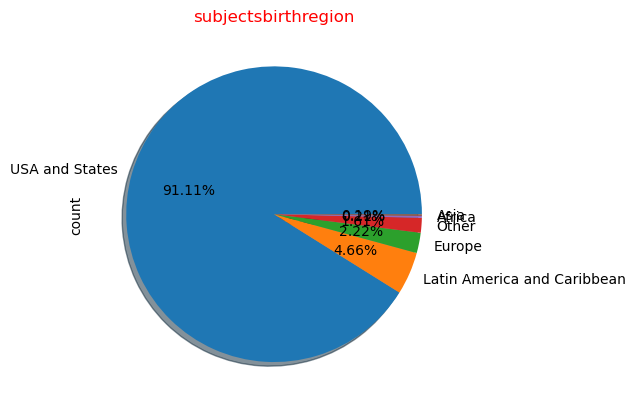

In [1312]:
plt.rcParams.update({'font.size': 10})
df['subjectsbirthregion'].value_counts().plot.pie(
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('subjectsbirthregion',color='Red',loc='center');
plt.show()

## Droping Some Useless features

In [1314]:
df.drop("subjectnumericrace", axis = 1, inplace = True)
# SubjectNumericRace – Subject Numeric Race; a single or multi-digit codeindicating a subject’s self-reported race or races (verified through interview).

In [1315]:
df.drop("date", axis = 1, inplace = True)
# Date – Date the participant was measured, ranging from “04-Oct-10” to “05-Apr-12”

In [1316]:
df.drop("installation", axis = 1, inplace = True) 
# Installation – U.S. Army installation where the measurement occurred; e.g. “Fort Hood”, “Camp Shelby”

In [1317]:
df.drop("subjectid", axis = 1, inplace = True)
# subjectid – A unique number for each participant measured in the anthropometric survey, ranging from 10027 to 920103, not inclusive

In [1318]:
df.drop("primarymos", axis = 1, inplace = True)
# Primary Military Occupational Specialty

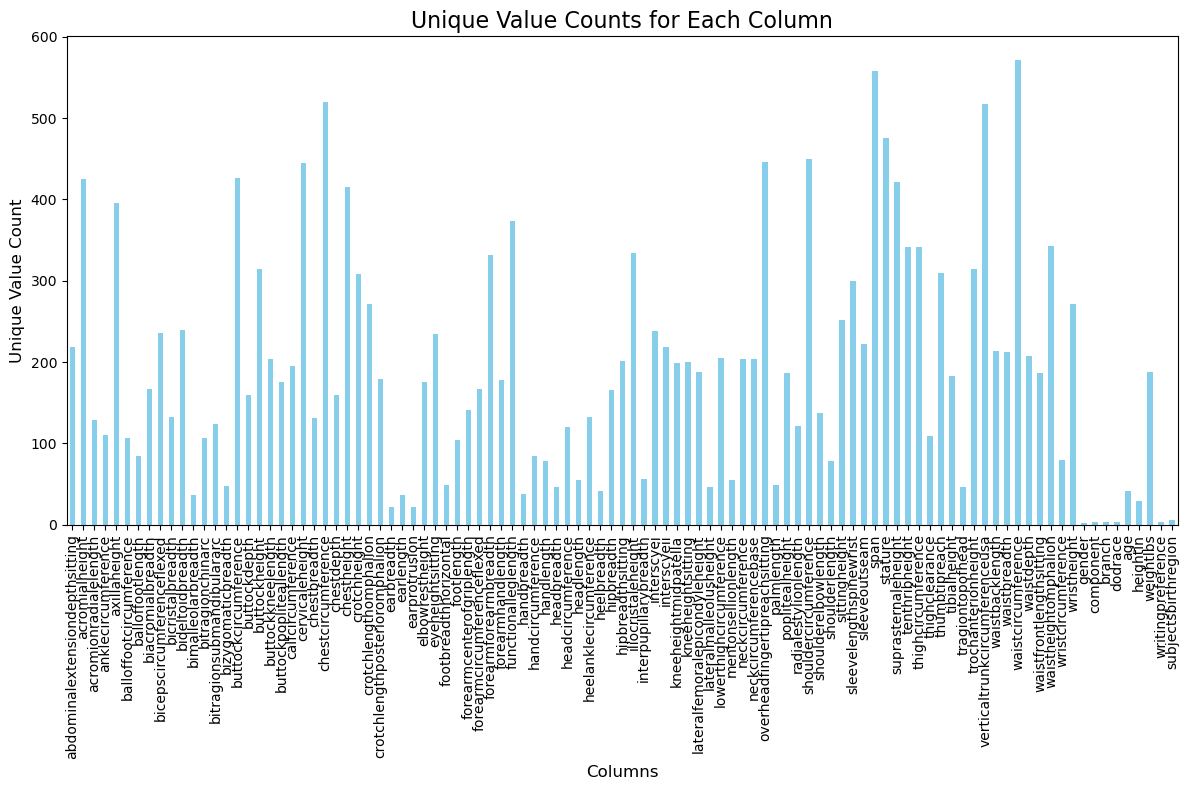

In [1319]:
import pandas as pd
import matplotlib.pyplot as plt

# Benzersiz değer sayısını hesapla
unique_counts = df.nunique()

# Bar grafiği oluştur
plt.figure(figsize=(12, 8))
unique_counts.plot(kind='bar', color='skyblue')
plt.title('Unique Value Counts for Each Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Unique Value Count', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()

# Grafiği göster
plt.show()

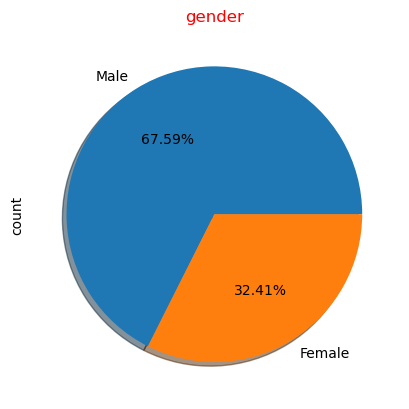

In [1320]:
plt.rcParams.update({'font.size': 10})
df['gender'].value_counts().plot.pie(#explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('gender',color='Red',loc='center');
plt.show()

In [1321]:
df.dodrace.value_counts()

dodrace
1    3792
2    1298
3     679
Name: count, dtype: int64

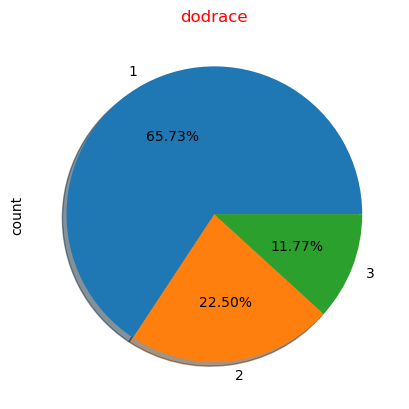

In [1322]:
plt.rcParams.update({'font.size': 10})
df['dodrace'].value_counts().plot.pie(#explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('dodrace',color='Red',loc='center');
plt.show()

In [1323]:
df[(df["dodrace"] != 1) & (df["dodrace"] != 2) & (df["dodrace"] != 3)]

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,wristheight,gender,component,branch,dodrace,age,heightin,weightlbs,writingpreference,subjectsbirthregion


In [1324]:
df['dodrace'] = df['dodrace'].map({1: 0, 2: 1, 3: 2}) # for some models we shoud start our target from 0 ex: XGBoost

In [1325]:
df.dodrace

0       0
1       0
2       1
3       0
4       1
       ..
6063    2
6064    2
6065    1
6066    2
6067    2
Name: dodrace, Length: 5769, dtype: int64

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [1327]:
X = df.drop("dodrace", axis = 1)
y = df.dodrace

In [1328]:
X.head(2)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,wristcircumference,wristheight,gender,component,branch,age,heightin,weightlbs,writingpreference,subjectsbirthregion
0,266,1467,337,222,1347,253,202,401,369,274,...,175,853,Male,Regular Army,Combat Arms,41,71,180,Right hand,USA and States
1,233,1395,326,220,1293,245,193,394,338,257,...,167,815,Male,Regular Army,Combat Support,35,68,160,Left hand,USA and States


In [1329]:
y

0       0
1       0
2       1
3       0
4       1
       ..
6063    2
6064    2
6065    1
6066    2
6067    2
Name: dodrace, Length: 5769, dtype: int64

In [1330]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,stratify=y, random_state=42)

In [1331]:
numeric_features = df.drop("dodrace", axis =1).select_dtypes(include ="number").columns
numeric_features

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'handbreadth',
      

In [1332]:
cat_features =  df.select_dtypes(include ="object").columns
cat_features

Index(['gender', 'component', 'branch', 'writingpreference',
       'subjectsbirthregion'],
      dtype='object')

In [1333]:
column_transformer = make_column_transformer(
    (StandardScaler(), numeric_features),       # For Scaling 
    (OneHotEncoder(), cat_features)     # For Encoding 
)

In [1334]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## Logistic model

In [1337]:
operations = [ ("transformer",column_transformer), 
              ("logistic",LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]

In [1338]:
logistic_vanilla = Pipeline(steps=operations)

In [1339]:
logistic_vanilla.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bim...
       'waistfrontlengthsitting', 'waistheightomphalion', 'wristcircumference',
       'wristheight', 'age', 'heightin', 'weightlbs'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['gender', 'component', 'branch', 'writingpreference',
       'subjectsbirthregion'],
      dtype='object'))])),
                ('logistic',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [1340]:
eval_metric(logistic_vanilla, X_train, y_train, X_test, y_test)

Test_Set
[[641  18  99]
 [ 13 235  12]
 [ 41   9  86]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       758
           1       0.90      0.90      0.90       260
           2       0.44      0.63      0.52       136

    accuracy                           0.83      1154
   macro avg       0.75      0.79      0.77      1154
weighted avg       0.86      0.83      0.84      1154


Train_Set
[[2582   55  397]
 [  24  965   49]
 [  78   29  436]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      3034
           1       0.92      0.93      0.92      1038
           2       0.49      0.80      0.61       543

    accuracy                           0.86      4615
   macro avg       0.79      0.86      0.81      4615
weighted avg       0.90      0.86      0.87      4615



### Logistic Gridsearch

In [1342]:
operations = [ ("transformer",column_transformer), 
              ("logistic",LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]

In [1343]:
logistic_vanilla = Pipeline(steps=operations)

In [1344]:
param_grid = {
    'logistic__C': [0.1, 1, 10, 100],  # C değeri genişletildi
    'logistic__penalty': ['l1', 'l2'],  # Hem l1 hem l2 kullanılıyor
    'logistic__solver': ['liblinear', 'lbfgs'],  # Uyumlu solver'lar
    #'logistic__class_weight': [None, 'balanced'],  # Dengesiz veri seti için balanced
    'logistic__max_iter': [200, 500]  # Daha fazla iterasyon denendi
}
  

cv = StratifiedKFold(n_splits = 10)

In [1345]:
logistic_grid = GridSearchCV(estimator = logistic_vanilla,
                             param_grid= param_grid,
                             cv = cv,
                             scoring='recall_weighted',
                             n_jobs= -1,
                             return_train_score= True).fit(X_train,y_train)

In [1346]:
eval_metric(logistic_grid, X_train, y_train, X_test, y_test)

Test_Set
[[698  20  40]
 [ 16 238   6]
 [ 50  11  75]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       758
           1       0.88      0.92      0.90       260
           2       0.62      0.55      0.58       136

    accuracy                           0.88      1154
   macro avg       0.81      0.80      0.80      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[2851   60  123]
 [  48  970   20]
 [ 166   42  335]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      3034
           1       0.90      0.93      0.92      1038
           2       0.70      0.62      0.66       543

    accuracy                           0.90      4615
   macro avg       0.85      0.83      0.84      4615
weighted avg       0.90      0.90      0.90      4615



In [1347]:
logistic_grid.best_params_

{'logistic__C': 0.1,
 'logistic__max_iter': 200,
 'logistic__penalty': 'l2',
 'logistic__solver': 'liblinear'}

## SVC

## RF

In [1350]:
operations = [ ("transformer",column_transformer), 
              ("RF_model",RandomForestClassifier(class_weight='balanced',random_state=42))]

In [1351]:
rf_vanilla = Pipeline(steps= operations).fit(X_train,y_train)

In [1352]:
eval_metric(rf_vanilla, X_train, y_train, X_test, y_test)

Test_Set
[[745   7   6]
 [ 81 177   2]
 [ 95   8  33]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       758
           1       0.92      0.68      0.78       260
           2       0.80      0.24      0.37       136

    accuracy                           0.83      1154
   macro avg       0.85      0.64      0.68      1154
weighted avg       0.83      0.83      0.80      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### RF GridSerarchCV

In [1354]:
param_grid = {'RF_model__n_estimators':[64, 128, 200],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4],
             'RF_model__min_samples_split':[2, 3,4],
             'RF_model__min_samples_leaf': [2,3,4],
             'RF_model__max_samples':[0.8, 1]}
cv = StratifiedKFold(n_splits = 10)

In [1355]:
operations = [ ("transformer",column_transformer), 
              ("RF_model",RandomForestClassifier(class_weight='balanced',random_state=42))]
rf_vanilla = Pipeline(steps= operations)

In [1356]:
rf_grid_model = GridSearchCV(rf_vanilla, param_grid, cv = cv, scoring = "recall_weighted", n_jobs = -1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 486 candidates, totalling 4860 fits


In [1357]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[474  78 206]
 [ 25 192  43]
 [ 42  18  76]]
              precision    recall  f1-score   support

           0       0.88      0.63      0.73       758
           1       0.67      0.74      0.70       260
           2       0.23      0.56      0.33       136

    accuracy                           0.64      1154
   macro avg       0.59      0.64      0.59      1154
weighted avg       0.75      0.64      0.68      1154


Train_Set
[[2071  272  691]
 [ 103  832  103]
 [ 131   39  373]]
              precision    recall  f1-score   support

           0       0.90      0.68      0.78      3034
           1       0.73      0.80      0.76      1038
           2       0.32      0.69      0.44       543

    accuracy                           0.71      4615
   macro avg       0.65      0.72      0.66      4615
weighted avg       0.79      0.71      0.73      4615



## Boosting Methods

## XGBoost

In [1366]:
operations = [ ("transformer",column_transformer), 
              ("xgb_model", XGBClassifier(random_state = 42))]

In [1368]:
xgb_vanilla = Pipeline(steps = operations)

In [1370]:
eval_metric(xgb_vanilla, X_train, y_train, X_test, y_test)

NotFittedError: need to call fit or load_model beforehand

## Comparing Models

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

**SMOTE (Synthetic Minority Over-sampling Technique)**

**Kullanım Amacı:**

SMOTE, dengesiz veri setlerini dengelemek için kullanılan bir örnekleme tekniğidir. Dengesiz veri setleri, bir sınıfın diğer sınıflardan çok daha fazla örneğe sahip olduğu durumları ifade eder. Bu tür veri setlerinde, azınlık sınıfı (daha az örneği olan sınıf) genellikle göz ardı edilir ve model, çoğunluk sınıfını tahmin etmekte daha başarılı olur. SMOTE, azınlık sınıfından yeni "sentetik" örnekler üreterek bu dengesizliği gidermeye çalışır.

**Kullanım Yerleri:**

- **Kredi Riski Değerlendirmesi**: Dolandırıcılık durumları genellikle dengesizdir; yani, çoğu işlem yasal olup, sadece birkaçı dolandırıcılıktır.
- **Tıbbi Tanı**: Örneğin, bir hastalık nadir görülüyorsa, sağlıklı ve hasta örnekleri arasında dengesizlik olacaktır.
- **Müşteri Terk Analizi**: Çoğu müşteri hizmeti kullanmaya devam ederken, sadece birkaçı hizmeti bırakır.
- **Anomali Tespiti**: Normal durumlar genellikle daha sık görülürken, anomaliler (örneğin, güvenlik ihlalleri) nadirdir.

**Unbalanced Datalar için Önemi:**

Dengesiz veri setleri, sınıflandırma modellerinin performansını olumsuz etkileyebilir. Model, çoğunluk sınıfını tahmin etmekte iyi olabilir, ancak azınlık sınıfını genellikle göz ardı eder. Bu, özellikle azınlık sınıfı daha önemliyse (örneğin, dolandırıcılık tespiti, nadir hastalıkların teşhisi) problem olabilir. SMOTE, bu tür problemleri mitigasyon (hafifletme) amacıyla kullanılır.

**Nasıl Çalışır?**

1. Azınlık sınıfından rastgele bir örnek seçilir.
2. Bu örneğin k en yakın komşusu hesaplanır.
3. Rastgele seçilen k en yakın komşulardan biri seçilir.
4. Rastgele bir interpolasyon faktörü* üretilir.
5. Bu faktör kullanılarak yeni bir "sentetik" örnek oluşturulur.

**Kullanımı:**

Python'da, SMOTE genellikle imbalanced-learn kütüphanesi ile kullanılır.

*Interpolasyon faktörü, SMOTE algoritmasında yeni "sentetik" örnekler oluştururken kullanılan bir ağırlık faktörüdür. Temel fikir, azınlık sınıfından seçilen bir örnekle onun k en yakın komşuları arasında yeni bir örnek oluşturmaktır. Interpolasyon faktörü, bu iki örnek arasında ne kadar "yakın" olacağını belirler. SMOTE algoritmasının esnekliğini artırır ve azınlık sınıfının örneklerini daha geniş bir alana yayarak modelin genelleme yeteneğini iyileştirmeye yardımcı olur.

#  SHAP

**SHAP (SHapley Additive exPlanations)**

**Nedir?**

SHAP, makine öğrenimi modellerinin tahminlerini açıklamak için kullanılan bir araçtır. SHAP değerleri, bir modelin her bir özelliğinin bir tahmin üzerindeki etkisini ölçer. Bu değerler, kooperatif oyun teorisi olarak bilinen bir matematiksel teori olan Shapley değerlerine dayanır.

**Ne Amaçla Kullanılır?**
- **Model Yorumlanabilirliği**: Modelin hangi özelliklerin tahminleri en çok etkilediğini anlamak.
- **Özellik Seçimi**: En önemli özellikleri belirleyerek modelin karmaşıklığını azaltmak.
- **Denetim ve Uyum**: Modelin kararlarını açıklamak ve yasal gereksinimleri karşılamak.
- **Model Geliştirme**: Modelin hangi alanlarda iyi veya kötü performans gösterdiğini anlamak.

**Nerelerde Kullanılır?**
- **Kredi Skorlama**: Hangi faktörlerin bir kişinin kredi puanını etkilediğini anlamak.
- **Sağlık**: Hangi tıbbi özelliklerin bir hastalığı tahmin etmede önemli olduğunu belirlemek.
- **Pazarlama**: Müşteri davranışını etkileyen faktörleri anlamak.
- **Doğal Dil İşleme**: Metin sınıflandırma veya duygu analizi gibi NLP görevlerinde modelin hangi kelimeleri veya özellikleri önemli bulduğunu anlamak.

**Unbalanced Data Setlerinde Önemi
Dengesiz veri setlerinde, model genellikle çoğunluk sınıfına yanlı olabilir. SHAP, bu tür durumlar için de yararlıdır çünkü modelin azınlık sınıfını yanlış sınıflandırma nedenlerini açıklayabilir. Bu, modelin performansını artırmak için hangi özelliklerin daha fazla dikkate alınması gerektiğini anlamak için çok yararlıdır.

**SHAP, model yorumlanabilirliği için güçlü ve esnek bir araçtır ve birçok farklı türde makine öğrenimi modeli ile kullanılabilir.**

Bilgi için: https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

- Shap; bir tahmin yaparken gozlem bazinda veya tum data icinde class' lari tahmin ederken hangi feature' in ne kadar katkisi var, bunu gosterir. 

- Mesela bu datada Hispanic class' ina ait feature' lari secip sadece onlar uzerinden bir feature selection yaparsak skorlarimiz daha az gozlem sayisi ile daha iyi olabilir. 

- Daha once yaptigimiz feature importance isleminden daha farkli bir islem.

# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Faydalı Olması Temennisiyle, Teşekkürler</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |